<a href="https://colab.research.google.com/github/marianadc01/pml-assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mariana Dias Coelho (25605)

Curricular Unit - Practical Machine Learning

MSc in Green Data Science

**Assignment 3**

4 minute video + upload to Moodle

What to do:
- Adapt the Perceptron class in Overview notebook to address the two following goals:
    - It uses mini-batches;
    - It computes and displays (on the animation, similarly to the iterations) the loss over a test set.

- Describe the changes on the code and the effect of using mini-batches on the search of the best solution, as an alternative to stochastic gradient descent.


**Original code from ML_overview_with_examples**

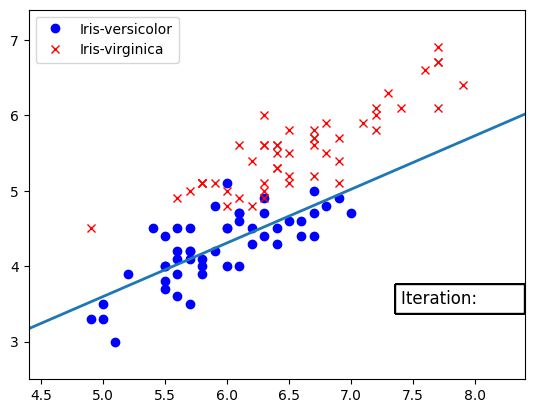

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

class Perceptron():
    #initialize hyperparameters (learning rate and number of iterations)
    def __init__(self, eta=0.1, n_iter=50, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        #iterate over labelled dataset updating weights for each features accordingly (stochastic gradient descent)
        for xi, label in zip(X, y):
            update = self.eta * (label-self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
        return self

    #compute the net input i.e scalar sum of X and the weights plus the bias value
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    #predict a classification for a sample of features X
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def init_plot(self):
        self.line.set_data([],[])
        return self.line,

    def animate(self, iteration_number, X, y):
        self.step_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        if iteration_number%2==0:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, f'Iteration: {iteration_number}', fontsize=12)  # Update iteration number
        else:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, 'Iteration:'+' '*8, fontsize=12, bbox=dict(facecolor='white', alpha=1))
        return self.line,

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0]/self.w_[2])/(self.w_[0]/self.w_[1])
        intercept = -self.w_[0]/self.w_[2]
        for i in np.linspace(np.amin(X[:,0])-0.5,np.amax(X[:,0])+0.5):
            #y=mx+c, m is slope and c is intercept
            x.append(i)
            y.append((slope*i) + intercept)

        return x, y

    def animated_fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights

        #here figure must be defined as a variable so it can be passed to FuncAnimation
        self.fig = plt.figure()

        #setting x and y limits with a 0.5 offset
        self.ax = plt.axes(xlim=(min(X[:,0])-0.5, max(X[:,0])+0.5), ylim=(min(X[:,1])-0.5, max(X[:,1])+0.5))

        #plotting our training points
        self.ax.plot(X[0:50, 0],X[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X[50:100, 0],X[50:100, 1], "rx", label=self.nameB)

        #labelling
        self.ax.legend(loc='upper left')

        #initialization of separation line and our animation object
        self.line, = self.ax.plot([], [], lw=2)
        anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter, interval=200, blit=True)
        anim.save('learning_process.gif', writer='imagemagick')

#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1= {'name':"Iris-setosa",'s':0,'end':50} #0:50 # small size
SPECIES_2= {'name':"Iris-versicolor",'s':50,'end':100} # 50:100
SPECIES_3= {'name':"Iris-virginica",'s':100,'end':150} # 100:150
spA,spB=SPECIES_2,SPECIES_3

#preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], [0,2]].values
y = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], 4].values
#y = np.where(y == 'Iris-setosa', -1, 1)
y = np.where(y == spB['name'], -1, 1)

ppn = Perceptron(eta=0.1, n_iter=150, nameA=spA['name'], nameB=spB['name']) #initializing a new perceptron
ppn.animated_fit(X, y)

**New code for the assignment**

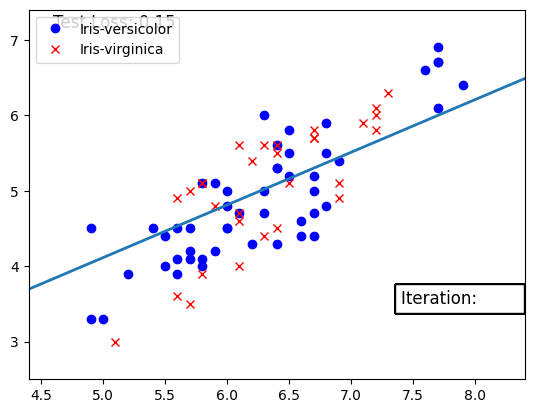

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

class Perceptron():
    def __init__(self, eta=0.1, n_iter=50, batch_size=10, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        self.w_ = np.random.uniform(-1, 1, X.shape[1] + 1)  # Initialize weights
        losses = []
        for _ in range(self.n_iter):
            idx = np.random.permutation(len(X))
            X_shuffle = X[idx]
            y_shuffle = y[idx]
            for i in range(0, len(X), self.batch_size):
                batch_X = X_shuffle[i:i+self.batch_size]
                batch_y = y_shuffle[i:i+self.batch_size]
                update = np.zeros(len(self.w_))
                for xi, label in zip(batch_X, batch_y):
                    error = label - self.predict(xi)
                    update[1:] += self.eta * error * xi
                    update[0] += self.eta * error
                self.w_ += update / self.batch_size
                losses.append(self.compute_loss(X, y))
        return losses

    def compute_loss(self, X, y):
        errors = 0
        for xi, label in zip(X, y):
            errors += int(label != self.predict(xi))
        return errors / len(X)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def init_plot(self):
        self.line.set_data([], [])
        self.loss_text.set_text('')
        return self.line, self.loss_text

    def animate(self, iteration_number, X_train, y_train, X_test, y_test):
        losses = self.step_fit(X_train, y_train)
        x, y = self.plot_line(X_train)
        self.line.set_data(x, y)
        if iteration_number % 2 == 0:
            self.ax.text(max(X_train[:, 0]) - 0.5, min(X_train[:, 1]) + 0.5, f'Iteration: {iteration_number}', fontsize=12)
        else:
            self.ax.text(max(X_train[:, 0]) - 0.5, min(X_train[:, 1]) + 0.5, 'Iteration:' + ' ' * 8, fontsize=12,
                         bbox=dict(facecolor='white', alpha=1))
        loss = self.compute_loss(X_test, y_test)
        self.loss_text.set_text(f'Test Loss: {loss:.2f}')
        return self.line, self.loss_text

    def plot_line(self, X):
        x = []
        y = []
        if self.w_[2] != 0:
            slope = -(self.w_[0] / self.w_[2]) / (self.w_[0] / self.w_[1])
            intercept = -self.w_[0] / self.w_[2]
            for i in np.linspace(np.amin(X[:, 0]) - 0.5, np.amax(X[:, 0]) + 0.5):
                x.append(i)
                y.append((slope * i) + intercept)
        else:
            x = [0, 0]
            y = [np.amin(X[:, 1]) - 0.5, np.amax(X[:, 1]) + 0.5]

        return x, y

    def animated_fit(self, X_train, y_train, X_test, y_test):
        self.fig = plt.figure()
        self.ax = plt.axes(xlim=(min(X_train[:, 0]) - 0.5, max(X_train[:, 0]) + 0.5),
                           ylim=(min(X_train[:, 1]) - 0.5, max(X_train[:, 1]) + 0.5))
        self.ax.plot(X_train[0:50, 0], X_train[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X_train[50:100, 0], X_train[50:100, 1], "rx", label=self.nameB)
        self.ax.legend(loc='upper left')
        self.line, = self.ax.plot([], [], lw=2)
        self.loss_text = self.ax.text(0.05, 0.95, '', transform=self.ax.transAxes, fontsize=12)
        anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot,
                             fargs=(X_train, y_train, X_test, y_test),
                             frames=self.n_iter, interval=200, blit=True)
        anim.save('new_learning_process.gif', writer='imagemagick')

# Load dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1 = {'name': "Iris-setosa", 's': 0, 'end': 50}  # 0:50 # small size
SPECIES_2 = {'name': "Iris-versicolor", 's': 50, 'end': 100}  # 50:100
SPECIES_3 = {'name': "Iris-virginica", 's': 100, 'end': 150}  # 100:150
spA, spB = SPECIES_2, SPECIES_3

# Prepare data
X = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end']], [0, 2]].values
y = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end']], 4].values
y = np.where(y == spB['name'], -1, 1)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run animated fitting
ppn = Perceptron(eta=0.1, n_iter=150, batch_size=10, nameA=spA['name'], nameB=spB['name'])
ppn.animated_fit(X_train, y_train, X_test, y_test)
